In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
from netrep.metrics import LinearMetric
from netrep.metrics import GaussianStochasticMetric

import sys
sys.path.insert(0,'../src')

# packages
import analysis as analysis
import activations as activations

In [3]:
# constant paths
rl_model_activations_path = "../data/activations_walker/walker_rl"
rl_hooks_path = rl_model_activations_path + "/hook_dict.npy"
rl_kinematics_path = rl_model_activations_path + "/kinematics_dict.npy"

bc_nonoise_model_activations_path = "../data/activations_walker/walker_nonoise_bcmodel_stochastic"
bc_nonoise_hooks_path = bc_nonoise_model_activations_path + "/hook_dict.npy"
bc_nonoise_kinematics_path = bc_nonoise_model_activations_path + "/kinematics_dict.npy"

bc_actnoise005_model_activations_path = "../data/activations_walker/walker_actnoise005_bcmodel_stochastic"
bc_actnoise005_hooks_path = bc_actnoise005_model_activations_path + "/hook_dict.npy"
bc_actnoise005_kinematics_path = bc_actnoise005_model_activations_path + "/kinematics_dict.npy"

bc_actnoise010_model_activations_path = "../data/activations_walker/walker_actnoise010_bcmodel_stochastic"
bc_actnoise010_hooks_path = bc_actnoise010_model_activations_path + "/hook_dict.npy"
bc_actnoise010_kinematics_path = bc_actnoise010_model_activations_path + "/kinematics_dict.npy"

bc_actnoise020_model_activations_path = "../data/activations_walker/walker_actnoise020_bcmodel_stochastic"
bc_actnoise020_hooks_path = bc_actnoise020_model_activations_path + "/hook_dict.npy"
bc_actnoise020_kinematics_path = bc_actnoise020_model_activations_path + "/kinematics_dict.npy"

bc_actnoise040_model_activations_path = "../data/activations_walker/walker_actnoise040_bcmodel_stochastic"
bc_actnoise040_hooks_path = bc_actnoise040_model_activations_path + "/hook_dict.npy"
bc_actnoise040_kinematics_path = bc_actnoise040_model_activations_path + "/kinematics_dict.npy"

bc_actnoise080_model_activations_path = "../data/activations_walker/walker_actnoise080_bcmodel_stochastic"
bc_actnoise080_hooks_path = bc_actnoise080_model_activations_path + "/hook_dict.npy"
bc_actnoise080_kinematics_path = bc_actnoise080_model_activations_path + "/kinematics_dict.npy"

bc_actnoise160_model_activations_path = "../data/activations_walker/walker_actnoise160_bcmodel_stochastic"
bc_actnoise160_hooks_path = bc_actnoise160_model_activations_path + "/hook_dict.npy"
bc_actnoise160_kinematics_path = bc_actnoise160_model_activations_path + "/kinematics_dict.npy"

In [4]:
# load hook data
rl_hook_dict = activations.load_hook_dict(rl_hooks_path)

bc_nonoise_hook_dict = activations.load_hook_dict(bc_nonoise_hooks_path)
bc_actnoise005_hook_dict = activations.load_hook_dict(bc_actnoise005_hooks_path)
bc_actnoise010_hook_dict = activations.load_hook_dict(bc_actnoise010_hooks_path)
bc_actnoise020_hook_dict = activations.load_hook_dict(bc_actnoise020_hooks_path)
bc_actnoise040_hook_dict = activations.load_hook_dict(bc_actnoise040_hooks_path)
bc_actnoise080_hook_dict = activations.load_hook_dict(bc_actnoise080_hooks_path)
bc_actnoise160_hook_dict = activations.load_hook_dict(bc_actnoise160_hooks_path)

# load kinematics data
rl_kinematics_dict = np.load(rl_kinematics_path, allow_pickle=True).item()

bc_nonoise_kinematics_dict = np.load(bc_nonoise_kinematics_path, allow_pickle=True).item()
bc_actnoise005_kinematics_dict = np.load(bc_actnoise005_kinematics_path, allow_pickle=True).item()
bc_actnoise010_kinematics_dict = np.load(bc_actnoise010_kinematics_path, allow_pickle=True).item()
bc_actnoise020_kinematics_dict = np.load(bc_actnoise020_kinematics_path, allow_pickle=True).item()
bc_actnoise040_kinematics_dict = np.load(bc_actnoise040_kinematics_path, allow_pickle=True).item()
bc_actnoise080_kinematics_dict = np.load(bc_actnoise080_kinematics_path, allow_pickle=True).item()
bc_actnoise160_kinematics_dict = np.load(bc_actnoise160_kinematics_path, allow_pickle=True).item()


In [6]:
rl_hook_dict['linear1'].shape

(100000, 1024)

In [7]:
bc_nonoise_hook_dict['linear1'].shape

(100000, 1024)

In [13]:
# from netrep.metrics import LinearMetric
# from netrep.metrics import GaussianStochasticMetric

# Rotationally invariant metric (fully regularized).
proc_metric = LinearMetric(alpha=1.0, center_columns=True)

# Linearly invariant metric (no regularization).
cca_metric = LinearMetric(alpha=0.0, center_columns=True)

In [8]:
# make directory for plots
if not os.path.exists('viz'):
    os.makedirs('viz')

<Axes: xlabel='activation_2', ylabel='activation_1'>

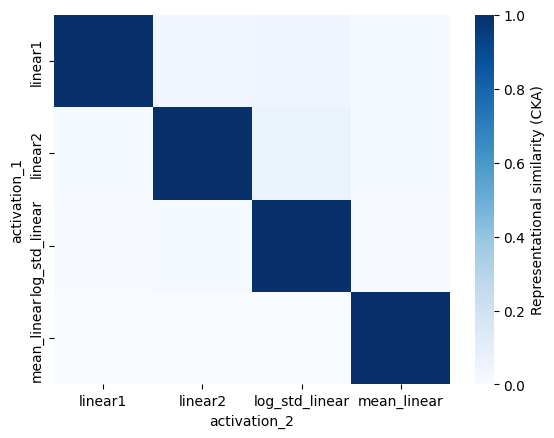

In [10]:
# cka between rl and bc
analysis.plot_cka_activations_between_models(rl_hook_dict, bc_nonoise_hook_dict, save_path='viz/rl_bc_nonoise_cka.png')

<Axes: xlabel='activation_2', ylabel='activation_1'>

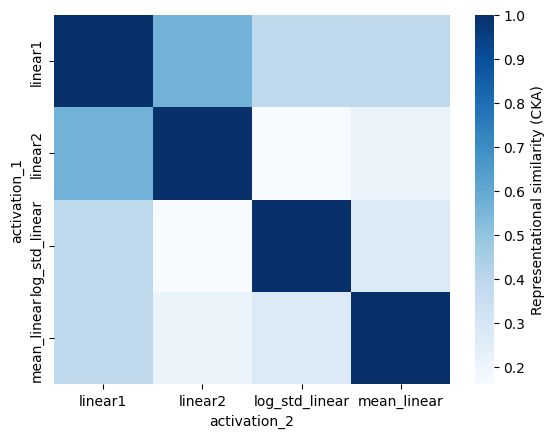

In [11]:
# cka between rl layers
analysis.plot_cka_activations(rl_hook_dict, save_path='viz/rl_cka.png')

<AxesSubplot:xlabel='activation', ylabel='kinematic_feature'>

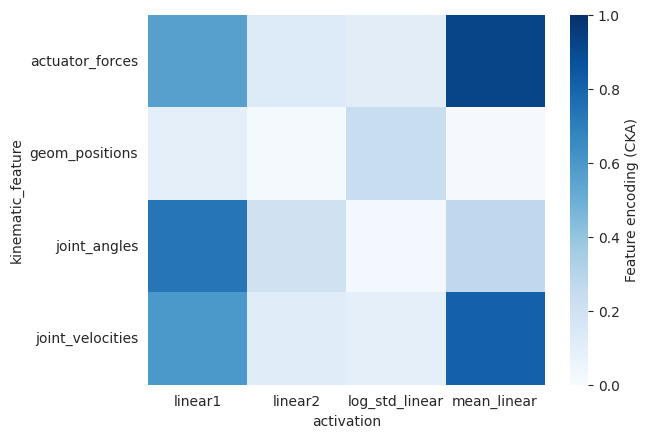

In [12]:
# cka between rl agent and rl kinematics
analysis.plot_cka_kinematics(rl_hook_dict, rl_kinematics_dict, save_path='pix/rl_kinematics_cka.png')

In [13]:
noise_levels = [0.05, 0.1, 0.2, 0.4, 0.8, 1.6]
noise_hook_dicts = [bc_actnoise005_hook_dict, bc_actnoise010_hook_dict, bc_actnoise020_hook_dict, bc_actnoise040_hook_dict, bc_actnoise080_hook_dict, bc_actnoise160_hook_dict]
kinematics_hook_dicts = [bc_actnoise005_kinematics_dict, bc_actnoise010_kinematics_dict, bc_actnoise020_kinematics_dict, bc_actnoise040_kinematics_dict, bc_actnoise080_kinematics_dict, bc_actnoise160_kinematics_dict]

for noise_level, noise_hook_dict, noise_kinematics_dict in zip(noise_levels, noise_hook_dicts, kinematics_hook_dicts):
    # plot cka between rl and bc
    analysis.plot_cka_activations_between_models(rl_hook_dict, noise_hook_dict, save_path=f'pix/rl_bc_actnoise{noise_level}_cka.png')
    # clear the plot
    plt.clf()

    # plot cka between bc layers
    analysis.plot_cka_activations(noise_hook_dict, save_path=f'pix/bc_actnoise{noise_level}_cka.png')
    # clear the plot
    plt.clf()

    # plot cka between bc agent and bc kinematics
    analysis.plot_cka_kinematics(noise_hook_dict, noise_kinematics_dict, save_path=f'pix/bc_actnoise{noise_level}_kinematics_cka.png')
    # clear the plot
    plt.clf()


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
save_path='src/viz/cka_activations_compare.png'

def pairwise_comparison(loaded_hook_dict, loaded_hook_dict2, save_path='pix/test_activations_compare.png'):
    comparison_dict = {'activation_1': [],
                 'activation_2': [],
                 'metric': []}

    # get combinations between activations
    for activation1 in loaded_hook_dict.keys():
        for activation2 in loaded_hook_dict2.keys():
            #change here for metric swap
            proc_metric = LinearMetric(alpha=1.0, center_columns=True)
            proc_metric.fit(loaded_hook_dict[activation1], loaded_hook_dict2[activation2])
            dist = proc_metric.score(loaded_hook_dict[activation1], loaded_hook_dict2[activation2])

            comparison_dict['metric'].append(dist)
            comparison_dict['activation_1'].append(activation1)
            comparison_dict['activation_2'].append(activation2)

    df_c = pd.DataFrame(comparison_dict).pivot('activation_1', 'activation_2', 'metric')
    # force bar to be between 0 and 1
    plot_c = sns.heatmap(df_c, cbar_kws={'label': 'Representational similarity (METRIC NAME)'}, cmap='Blues', vmin=0, vmax=1)
    plt.savefig(save_path)
